# Selected Model Training

## EDA, Data Cleaning with no outlier removal

In [1]:
import dtale
import pandas as pd
df = pd.read_csv('dataset_00_with_header.csv')
#d = dtale.show(df)
#d.open_browser()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,...,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,...,0,NaN,0,0,0,0,NaN,0,NaN,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,...,0,NaN,1,1,1,0,NaN,0,NaN,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,...,0,NaN,0,0,0,0,NaN,0,NaN,496


In [4]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

### Split into train and test

In [5]:
from sklearn.model_selection import train_test_split
df , df_test = train_test_split(df, train_size=0.75, random_state=42)

In [6]:
df_test.to_csv('test.csv',index=False)

### Check duplicates

In [7]:
df[df.duplicated()]

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y


### Clean features with low variance

In [8]:
df.nunique().sort_values()

x096        1
x067        1
x095        1
x094        1
x263        2
x262        2
x147        2
x180        2
x083        2
x299        2
x298        2
x093        2
x092        2
x060        2
x091        2
x090        2
x089        2
x088        2
x087        2
x086        2
x161        2
x085        2
x154        2
x284        2
x084        2
x283        2
x282        2
x300        2
x026        2
x261        2
x260        2
x301        2
x006        2
x249        2
x248        2
x247        2
x246        2
x027        2
x244        2
x269        2
x270        2
x245        2
x082        2
x025        2
x271        2
x252        4
x077        4
x037        5
x078        5
x023        6
x068        6
x302        7
x022        7
x155        7
x050        7
x148        7
x253        8
x162        8
x287        8
x052        8
x051        8
x079        8
x053        9
x049        9
x107       10
x156       10
x038       11
x054       11
x229       11
x163       11
x048       11
x047  

In [9]:
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in counts.items() if v == 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(75000, 305)
['x067', 'x094', 'x095', 'x096']
(75000, 301)


(75000, 300) (75000,)
>Threshold=0.00, Features=300
>Threshold=0.05, Features=282
>Threshold=0.10, Features=268
>Threshold=0.15, Features=259
>Threshold=0.20, Features=240
>Threshold=0.25, Features=221
>Threshold=0.30, Features=217
>Threshold=0.35, Features=214
>Threshold=0.40, Features=210
>Threshold=0.45, Features=206
>Threshold=0.50, Features=201


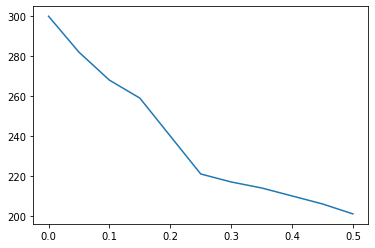

In [10]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold


data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [11]:
data = df.values
cols = df.columns
X = data[:, :-1]
y = data[:, -1]
transform = VarianceThreshold(threshold=0.25)
# transform the input data
X_sel = transform.fit_transform(X)
# determine the number of input features
n_features = X_sel.shape[1]
print('>Threshold=%.2f, Features=%d' % (t, n_features))

>Threshold=0.50, Features=221


In [12]:
comb = zip(list(cols),list(transform.get_support()))
df = pd.DataFrame(X_sel, columns=[x for x,y in comb if y])
df = pd.concat([df,pd.DataFrame(y)],axis=1)
df=df.rename(columns={0:'y'})
df.head()

,x001,x002,x003,x004,x005,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x028,x029,x030,x031,x032,x033,x034,x035,x036,x038,x039,x040,x042,x043,x044,x045,x046,x047,x054,x055,x056,x059,x062,x063,x064,x065,x066,x071,x072,x073,x074,x075,x076,x081,x097,x098,x099,x103,x104,x105,x106,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x148,x149,x150,x151,x152,x153,x155,x157,x158,x159,x160,x162,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x177,x178,x179,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x250,x251,x253,x255,x256,x257,x258,x264,x265,x266,x267,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x285,x286,x287,x288,x289,x290,x291,x292,x294,x296,x302,x303,y
0,1280590.0,71.0,20.0,50.0,347.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,6.0,3.0,3.0,3.0,2.0,5.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,5000.0,3884.0,5300.0,500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,1017.0,5300.0,3884.0,71.0,20.0,45.5,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,8256.0,59.0,59.0,59.0,0.2910,10012.0,640.0,0.1207,0.0,0.0,0.0,9372.0,0.0,9372.0,1.0,0.0,1.0,59.0,59.0,59.0,8256.0,8256.0,0.0,8256.0,NaN,0.0,700.0
1,1164267.0,NaN,NaN,NaN,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,7927.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,505.0
2,1346906.0,124.0,124.0,124.0,128.0,0.0,0.0,0.0,0.0,4.0,4.0,6.0,7.0,21.0,1.0,20.0,4.0,1.0,7.0,1.0,1.0,1.0,12.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,10000.0,10500.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,2.0,10.0,0.0,0.0,0.0,8.0,0.0,11498.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,80.0,124.0,0.0,0.0,0.0,8.0,16.0,0.0,0.0,8.0,80.0,124.0,0.0,0.0,0.0,8.0,16.0,0.0,0.0,8.0,72.0,108.0,0.0,0.0,8.0,64.0,92.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10500.0,10000.0,124.0,124.0,124.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0576,3952.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,5.0,0.0,618.0
3,1555326.0,33.0,5.0,16.0,41.0,1.0,2.0,3.0,3.0,1.0,0.

### Drop features with high number of missing values

In [13]:
df_null = pd.DataFrame((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))
df_null

,0
x242,93.317333
x098,80.620000
x155,79.076000
x255,76.934667
x256,76.934667
x257,76.934667
x302,73.042667
x253,66.428000
x162,66.386667
x266,66.365333


In [14]:
df.describe()

,x001,x002,x003,x004,x005,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x028,x029,x030,x031,x032,x033,x034,x035,x036,x038,x039,x040,x042,x043,x044,x045,x046,x047,x054,x055,x056,x059,x062,x063,x064,x065,x066,x071,x072,x073,x074,x075,x076,x081,x097,x098,x099,x103,x104,x105,x106,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x148,x149,x150,x151,x152,x153,x155,x157,x158,x159,x160,x162,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x177,x178,x179,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x250,x251,x253,x255,x256,x257,x258,x264,x265,x266,x267,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x285,x286,x287,x288,x289,x290,x291,x292,x294,x296,x302,x303,y
count,7.500000e+04,58953.000000,58953.000000,58958.000000,70415.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,6.027300e+04,60273.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,14535.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,43660.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,15693.000000,75000.000000,75000.000000,75000.000000,75000.000000,25210.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,60705.000000,59968.000000,75000.000000,47459.000000,47459.000000,47459.000000,75000.000000,75000.000000,5012.000000,75000.000000,75000.000000,75000.000000,25179.000000,17299.000000,17299.000000,17299.000000,7.500000e+04,75000.000000,25226.000000,25226.000000,25226.000000,69611.000000,7.500000e+04,7.500000e+04,32921.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000,56428.000000,37751.000000,37751.000000,37751.000000,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,20218.000000,75000.000000,75000.000000
mean,

In [15]:
del_col = list(df_null[df_null[0] > 75].index)

In [16]:
df=df.drop(columns=del_col,axis=1)
df.shape

(75000, 216)

### Determine imputation strategy and perform imputation

>mean -55.095 (0.755)
>median -54.761 (0.497)
>most_frequent -54.094 (0.497)
>constant -54.303 (0.472)


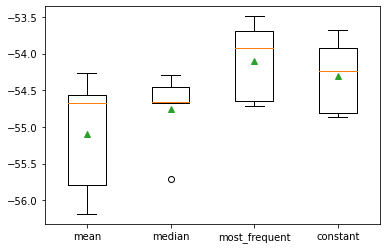

In [17]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

data = df.values
ix = [i for i in range(data.shape[1]) if i != data.shape[1]-1]
X, y = data[:, ix], data[:, data.shape[1]-1]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LinearRegression())])
	# evaluate the model
	cv = KFold(n_splits=5)
	scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [18]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
Xtrans = imputer.transform(X)

In [19]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

In [20]:
df_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_concat.columns = df.columns
df = df_concat.copy()
df.head()

,x001,x002,x003,x004,x005,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x028,x029,x030,x031,x032,x033,x034,x035,x036,x038,x039,x040,x042,x043,x044,x045,x046,x047,x054,x055,x056,x059,x062,x063,x064,x065,x066,x071,x072,x073,x074,x075,x076,x081,x097,x099,x103,x104,x105,x106,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x148,x149,x150,x151,x152,x153,x157,x158,x159,x160,x162,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x177,x178,x179,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x243,x250,x251,x253,x258,x264,x265,x266,x267,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x285,x286,x287,x288,x289,x290,x291,x292,x294,x296,x302,x303,y
0,1280590.0,71.0,20.0,50.0,347.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,6.0,3.0,3.0,3.0,2.0,5.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,5000.0,3884.0,5300.0,500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,1017.0,5300.0,3884.0,71.0,20.0,45.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,8256.0,59.0,59.0,59.0,0.2910,10012.0,640.0,0.1207,0.0,0.0,0.0,9372.0,0.0,9372.0,1.0,0.0,1.0,59.0,59.0,59.0,8256.0,8256.0,0.0,8256.0,1.0,0.0,700.0
1,1164267.0,4.0,2.0,4.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,300.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,7927.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,505.0
2,1346906.0,124.0,124.0,124.0,128.0,0.0,0.0,0.0,0.0,4.0,4.0,6.0,7.0,21.0,1.0,20.0,4.0,1.0,7.0,1.0,1.0,1.0,12.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,10000.0,10500.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,1.0,2.0,10.0,0.0,0.0,0.0,8.0,0.0,11498.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,80.0,124.0,0.0,0.0,0.0,8.0,16.0,0.0,0.0,8.0,80.0,124.0,0.0,0.0,0.0,8.0,16.0,0.0,0.0,8.0,72.0,108.0,0.0,0.0,8.0,64.0,92.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10500.0,10000.0,124.0,124.0,124.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,3.0,0.0576,3952.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,618.0
3,1555326.0,33.0,5.0,16.0,41.0,1.0,2.0,3.0,3.0,1.0,0.0,0.0,0.0,9.0,4.0,5.0,4.0,3.0,5.0,2.0,2.0,1.0,4.0,0.0,2.0,5.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,2.

In [21]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

y       0.0
x113    0.0
x125    0.0
x124    0.0
x123    0.0
x121    0.0
x120    0.0
x119    0.0
x118    0.0
x117    0.0
x116    0.0
x115    0.0
x114    0.0
x112    0.0
x303    0.0
x111    0.0
x110    0.0
x109    0.0
x106    0.0
x105    0.0
x104    0.0
x103    0.0
x099    0.0
x097    0.0
x081    0.0
x076    0.0
x126    0.0
x127    0.0
x128    0.0
x129    0.0
x153    0.0
x152    0.0
x151    0.0
x150    0.0
x149    0.0
x148    0.0
x146    0.0
x145    0.0
x144    0.0
x143    0.0
x142    0.0
x141    0.0
x140    0.0
x139    0.0
x138    0.0
x137    0.0
x136    0.0
x135    0.0
x134    0.0
x133    0.0
x132    0.0
x131    0.0
x130    0.0
x075    0.0
x074    0.0
x073    0.0
x030    0.0
x028    0.0
x024    0.0
x023    0.0
x022    0.0
x021    0.0
x020    0.0
x019    0.0
x018    0.0
x017    0.0
x016    0.0
x015    0.0
x014    0.0
x013    0.0
x012    0.0
x011    0.0
x010    0.0
x009    0.0
x008    0.0
x007    0.0
x005    0.0
x004    0.0
x003    0.0
x002    0.0
x029    0.0
x031    0.0
x072    0.0
x032

### Outlier analysis and handling

In [24]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [25]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
%matplotlib inline
import matplotlib.pyplot as plt
# calculate interquartile range
result=[]
for col in list(X.columns):
    print(col)
    data = X[col]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = X[(X[col] < lower) | (X[col] > upper)]
    print('Identified outliers: %d' % len(outliers))
    result.append(len(outliers))
    # remove outliers
    #df_copy = df_copy[(df_copy[col] >= lower) & (df_copy[col] <= upper)]
    #print('Non-outlier observations: %d' % len(df_copy)

x001
Percentiles: 25th=975152.250, 75th=1445469.000, IQR=470316.750
Identified outliers: 283
x002
Percentiles: 25th=5.000, 75th=151.000, IQR=146.000
Identified outliers: 2488
x003
Percentiles: 25th=2.000, 75th=17.000, IQR=15.000
Identified outliers: 9772
x004
Percentiles: 25th=4.000, 75th=77.000, IQR=73.000
Identified outliers: 2965
x005
Percentiles: 25th=94.000, 75th=237.000, IQR=143.000
Identified outliers: 2690
x007
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 5509
x008
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 3611
x009
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 2737
x010
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 9839
x011
Percentiles: 25th=0.000, 75th=3.000, IQR=3.000
Identified outliers: 3062
x012
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 5366
x013
Percentiles: 25th=0.000, 75th=2.000, IQR=2.000
Identified outliers: 5535
x014
Percentiles: 25th=0.000, 75th=7

Percentiles: 25th=1.000, 75th=1.000, IQR=0.000
Identified outliers: 4676
x164
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 3305
x165
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 3880
x166
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 4079
x167
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 4146
x168
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 7792
x169
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 5347
x170
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 8768
x171
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 13396
x172
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 16930
x173
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 6304
x174
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 12922
x177
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified out

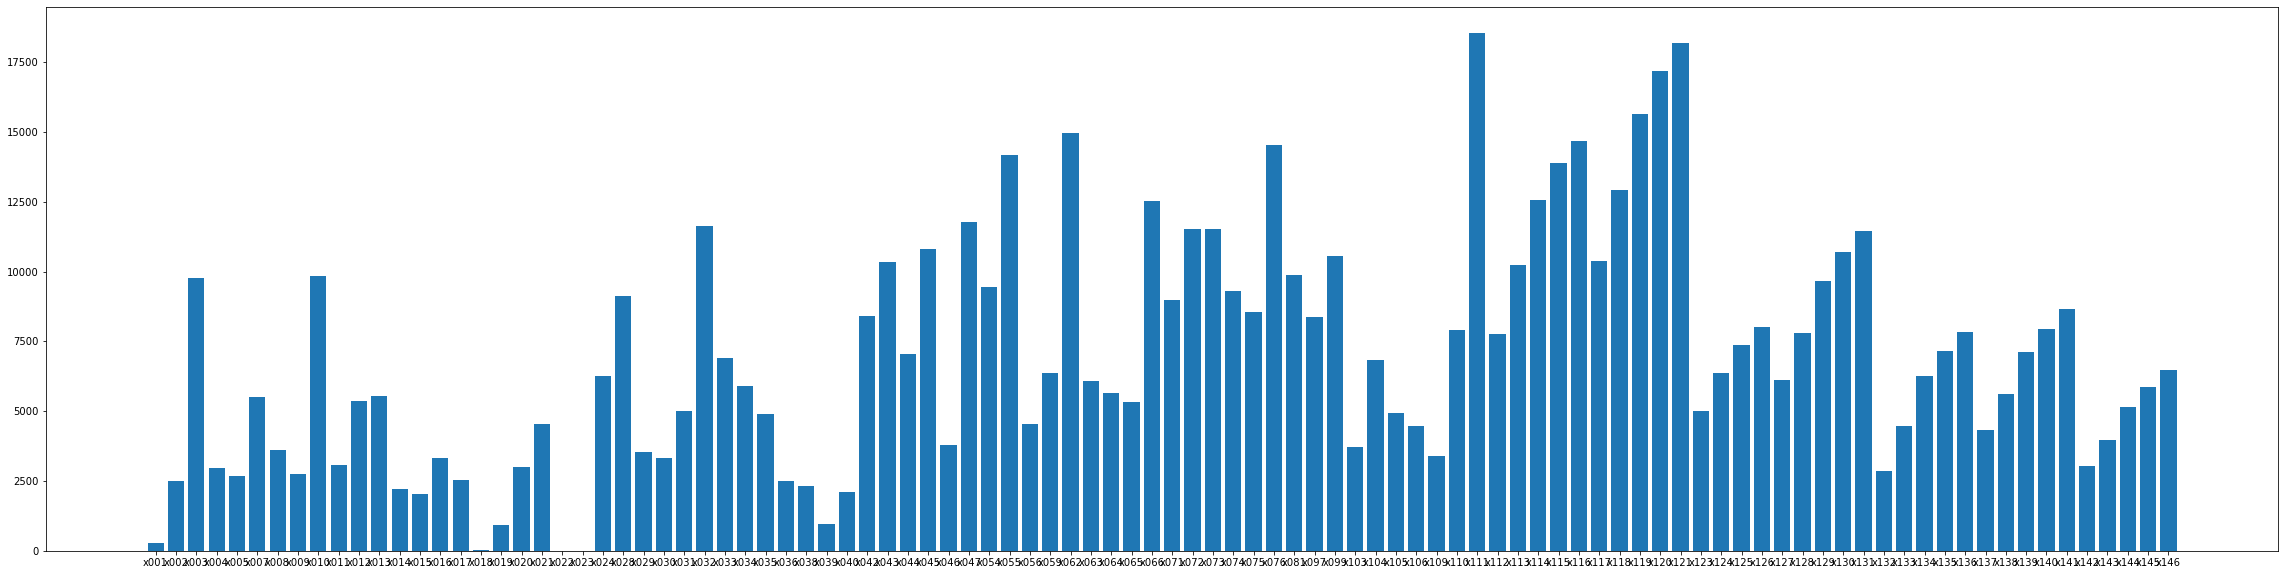

In [27]:
## Before
fig = plt.figure(figsize=(40,10))
plt.bar(X.columns[0:100],result[0:100])
plt.show()

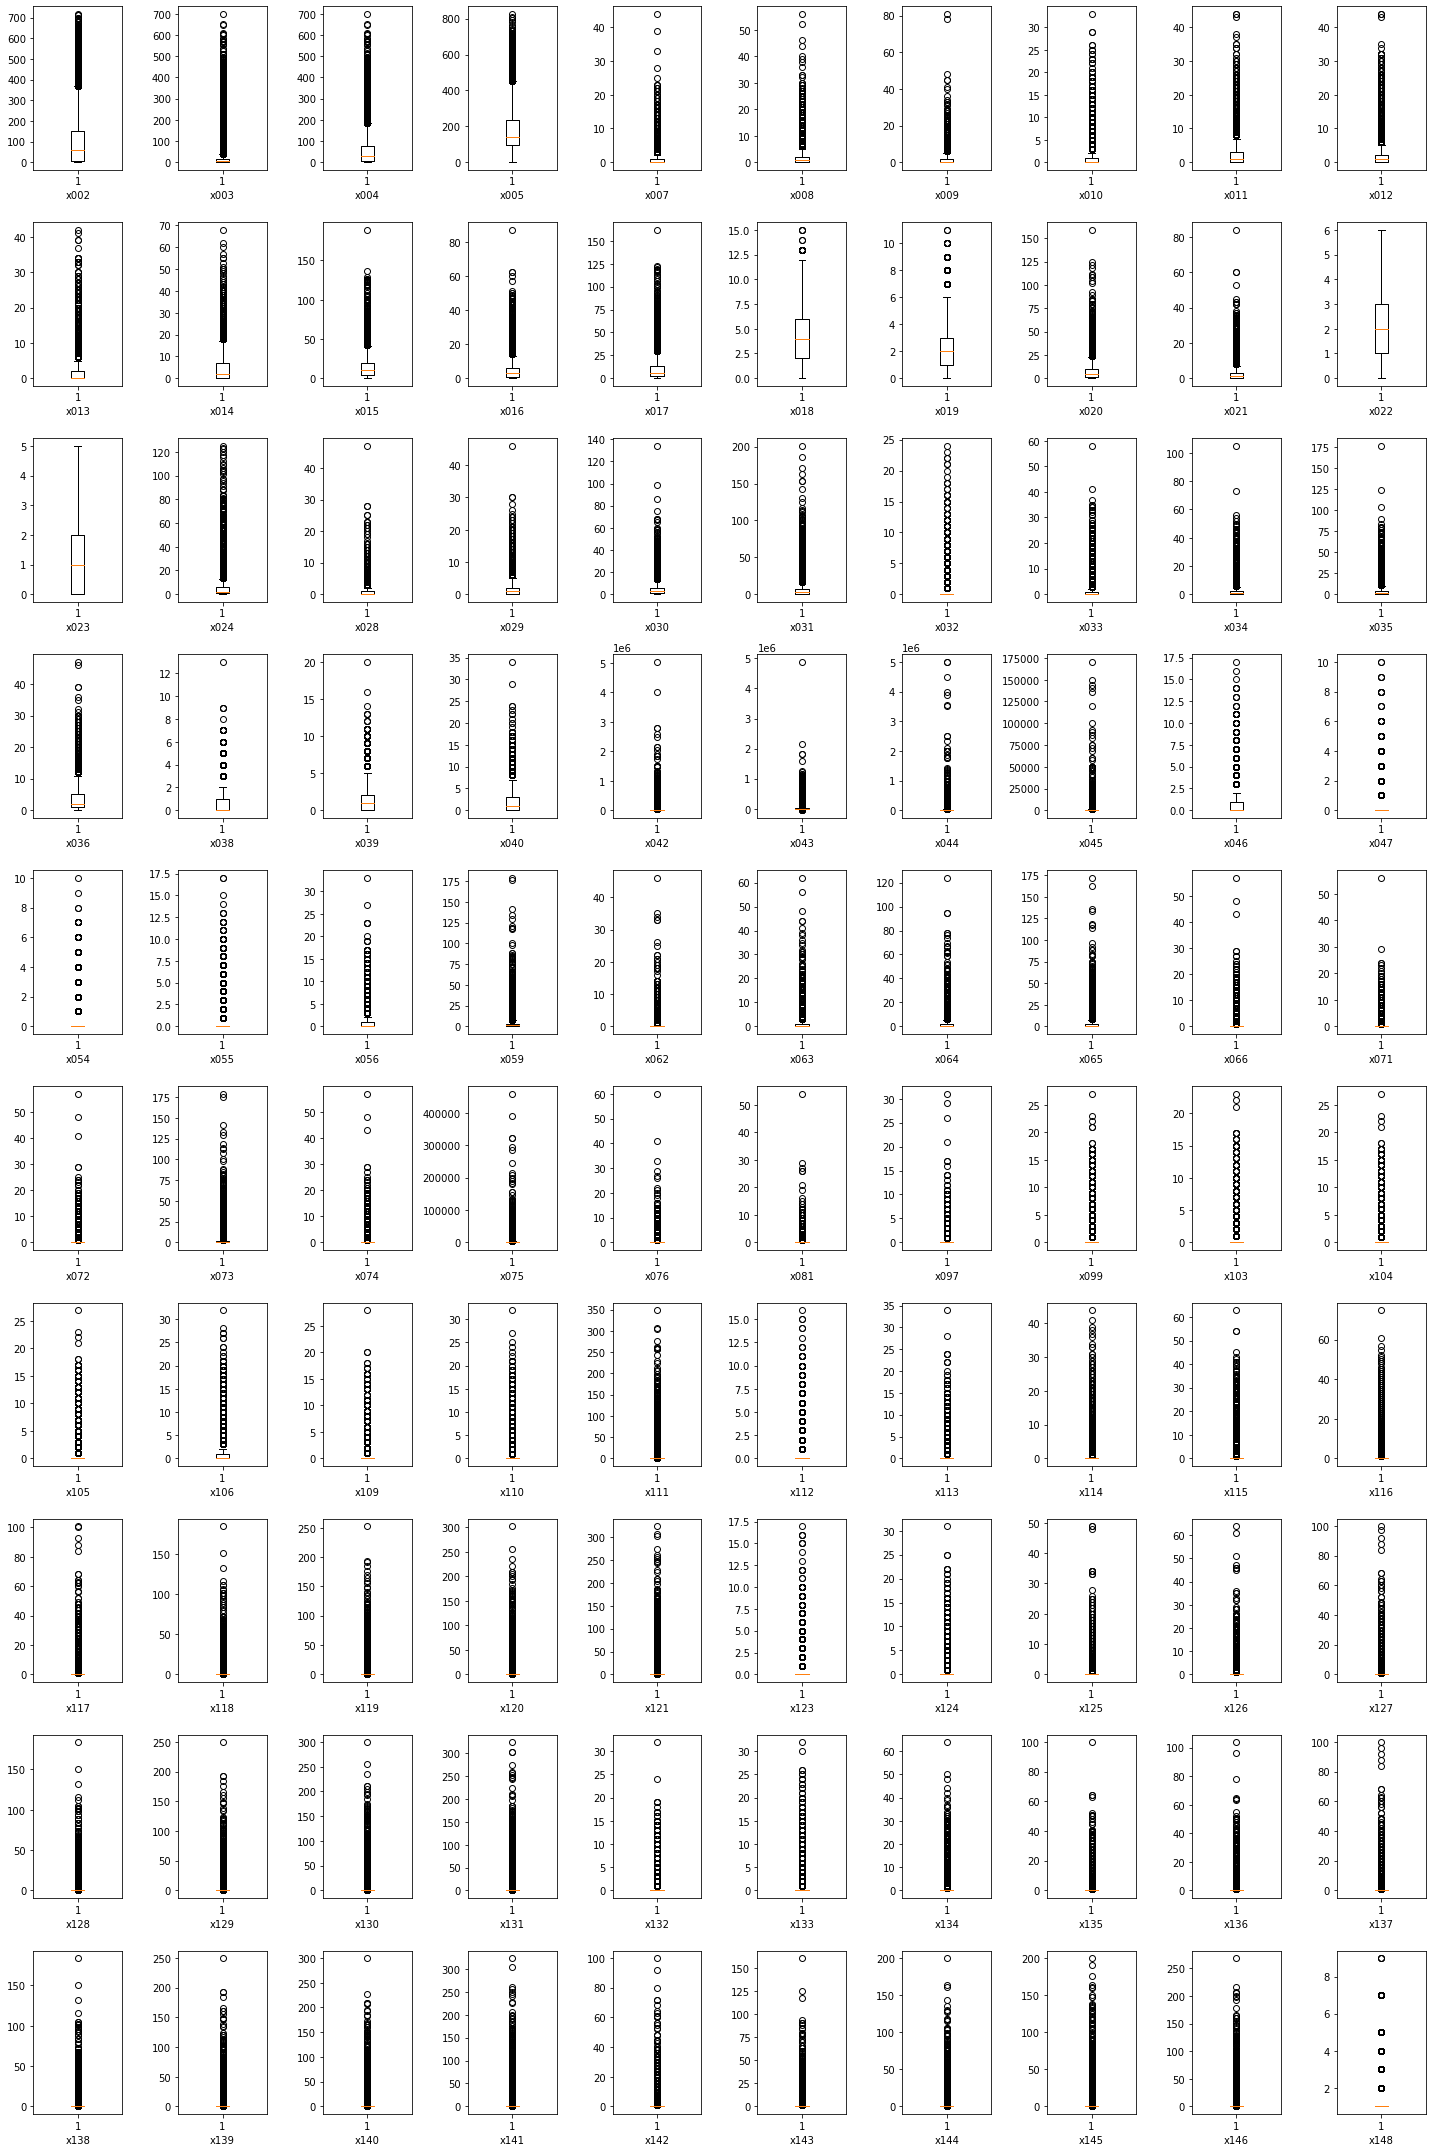

In [41]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i]])
    ax.set_xlabel(col[i])
plt.tight_layout()

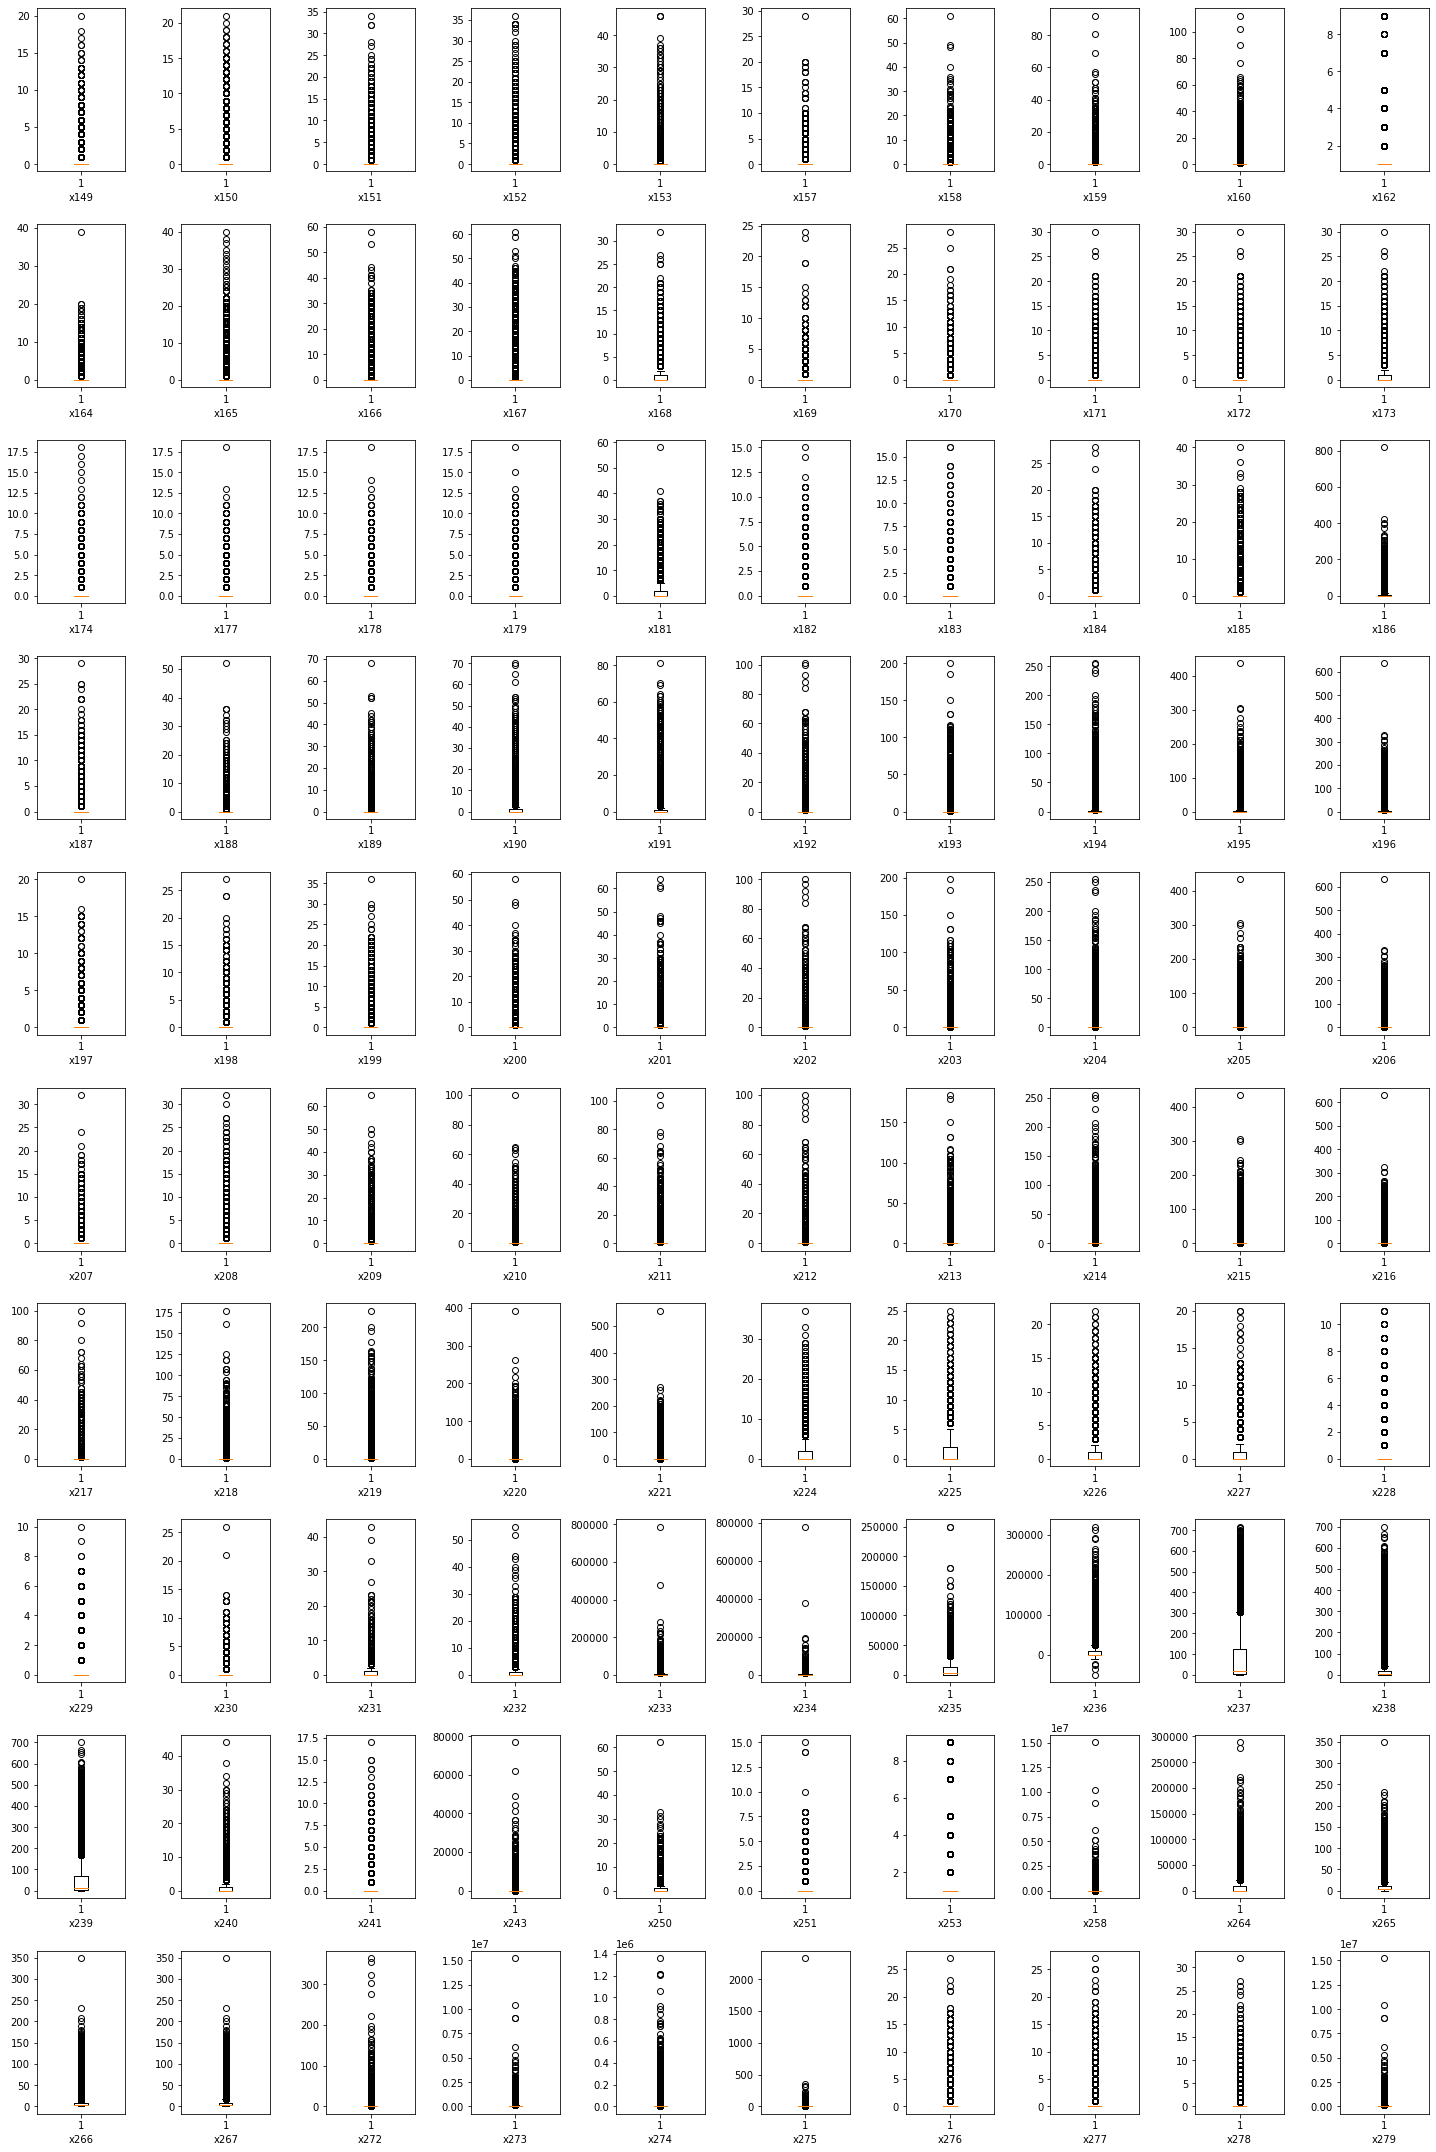

In [42]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+100]])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

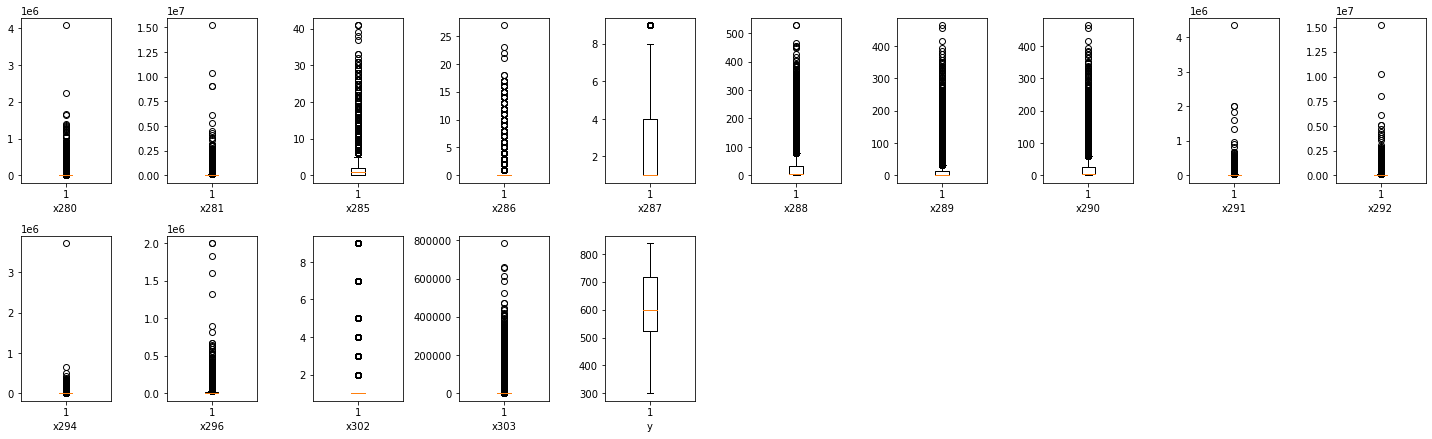

In [43]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+200]])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

In [ ]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i]])
    ax.set_xlabel(col[i])
plt.tight_layout()

col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+100]])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.boxplot(df[col[i+200]])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

In [257]:
X.describe()

,x001,x002,x003,x004,x005,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x028,x029,x030,x031,x032,x033,x034,x035,x036,x038,x039,x040,x042,x043,x044,x045,x046,x047,x054,x055,x056,x059,x062,x063,x064,x065,x066,x071,x072,x073,x074,x075,x076,x081,x097,x099,x103,x104,x105,x106,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x148,x149,x150,x151,x152,x153,x157,x158,x159,x160,x162,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x177,x178,x179,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x243,x250,x251,x253,x258,x264,x265,x266,x267,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x285,x286,x287,x288,x289,x290,x291,x292,x294,x296,x302,x303
count,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,75000.000000,75000.000000
mean,1.218538e+06,99.380027,20.348227,52.074253,174.508813,0.697320,1.390133,1.197360,1.024800,1.837293,1.608760,1.585453,4.287

### In this option, no outlier has been removed

In [22]:
df.to_csv('train_clean_withOutl.csv',index=False)

In [23]:
## save the train dataset proprocessed reviews to a file
import pickle
with open('train_cols.pkl', 'wb') as f:
    pickle.dump(list(df.columns), f)

## Data Visualization of Train and Test data

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

### Visualization of Train data

In [11]:
df = pd.read_csv('train_clean_withOutl.csv')

In [12]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [13]:
pca = PCA(n_components=2)
pca.fit(X)
Xtrans = pca.transform(X)

In [14]:
pca.explained_variance_ratio_

array([0.61103291, 0.30392583])

In [15]:
import numpy as np
rows=np.random.randint(1,Xtrans.shape[0],75000)
rows.shape

(75000,)

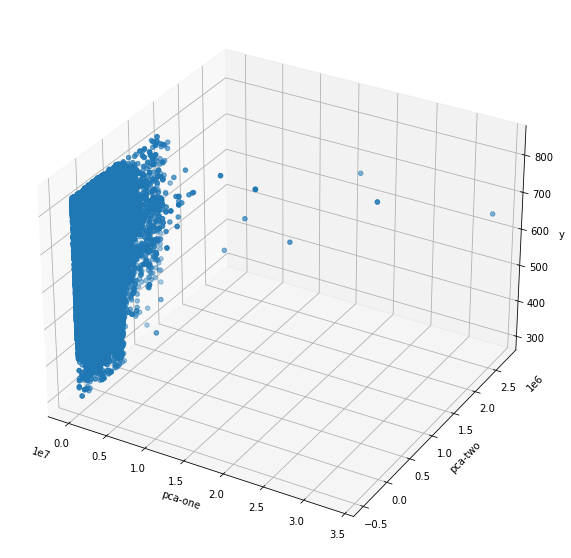

In [16]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=Xtrans[rows,0], 
    ys=Xtrans[rows,1], 
    zs=y[rows]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('y')
plt.show()

<AxesSubplot:ylabel='y'>

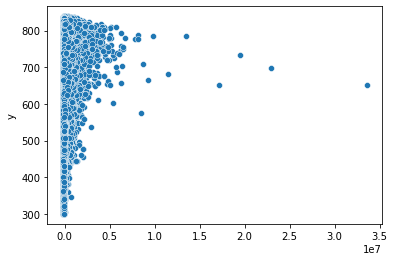

In [17]:
sns.scatterplot(x=Xtrans[:,0],y=y)

<AxesSubplot:ylabel='y'>

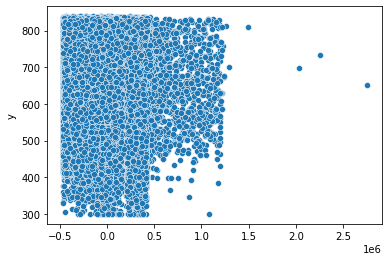

In [18]:
sns.scatterplot(x=Xtrans[:,1],y=y)

### Visualization of Test data

In [19]:
df = pd.read_csv('test_clean.csv')

In [20]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
Xtrans = pca.transform(X)

In [22]:
pca.explained_variance_ratio_

array([0.56382705, 0.31142479])

In [23]:
import numpy as np
rows=np.random.randint(1,Xtrans.shape[0],75000)
rows.shape

(75000,)

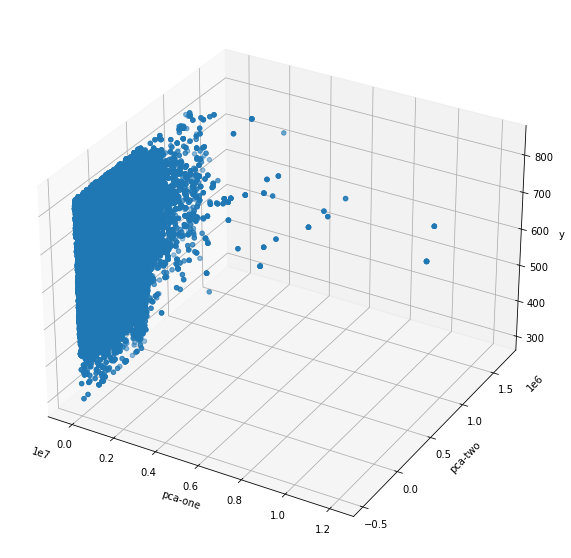

In [24]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=Xtrans[rows,0], 
    ys=Xtrans[rows,1], 
    zs=y[rows]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('y')
plt.show()

<AxesSubplot:ylabel='y'>

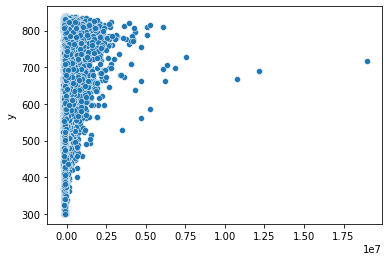

In [25]:
sns.scatterplot(x=Xtrans[:,0],y=y)

<AxesSubplot:ylabel='y'>

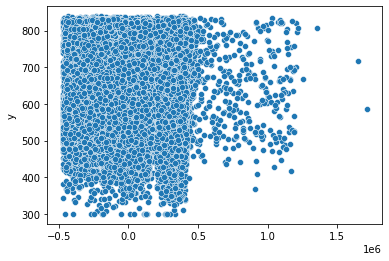

In [26]:
sns.scatterplot(x=Xtrans[:,1],y=y)

## Data Visualization - Correlation

### Dataset With outlier

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

In [49]:
df = pd.read_csv('train_clean_withOutl.csv')

In [50]:
df_copy = df.copy()
X = df_copy.drop('y',axis=1)
y = df_copy.pop('y')

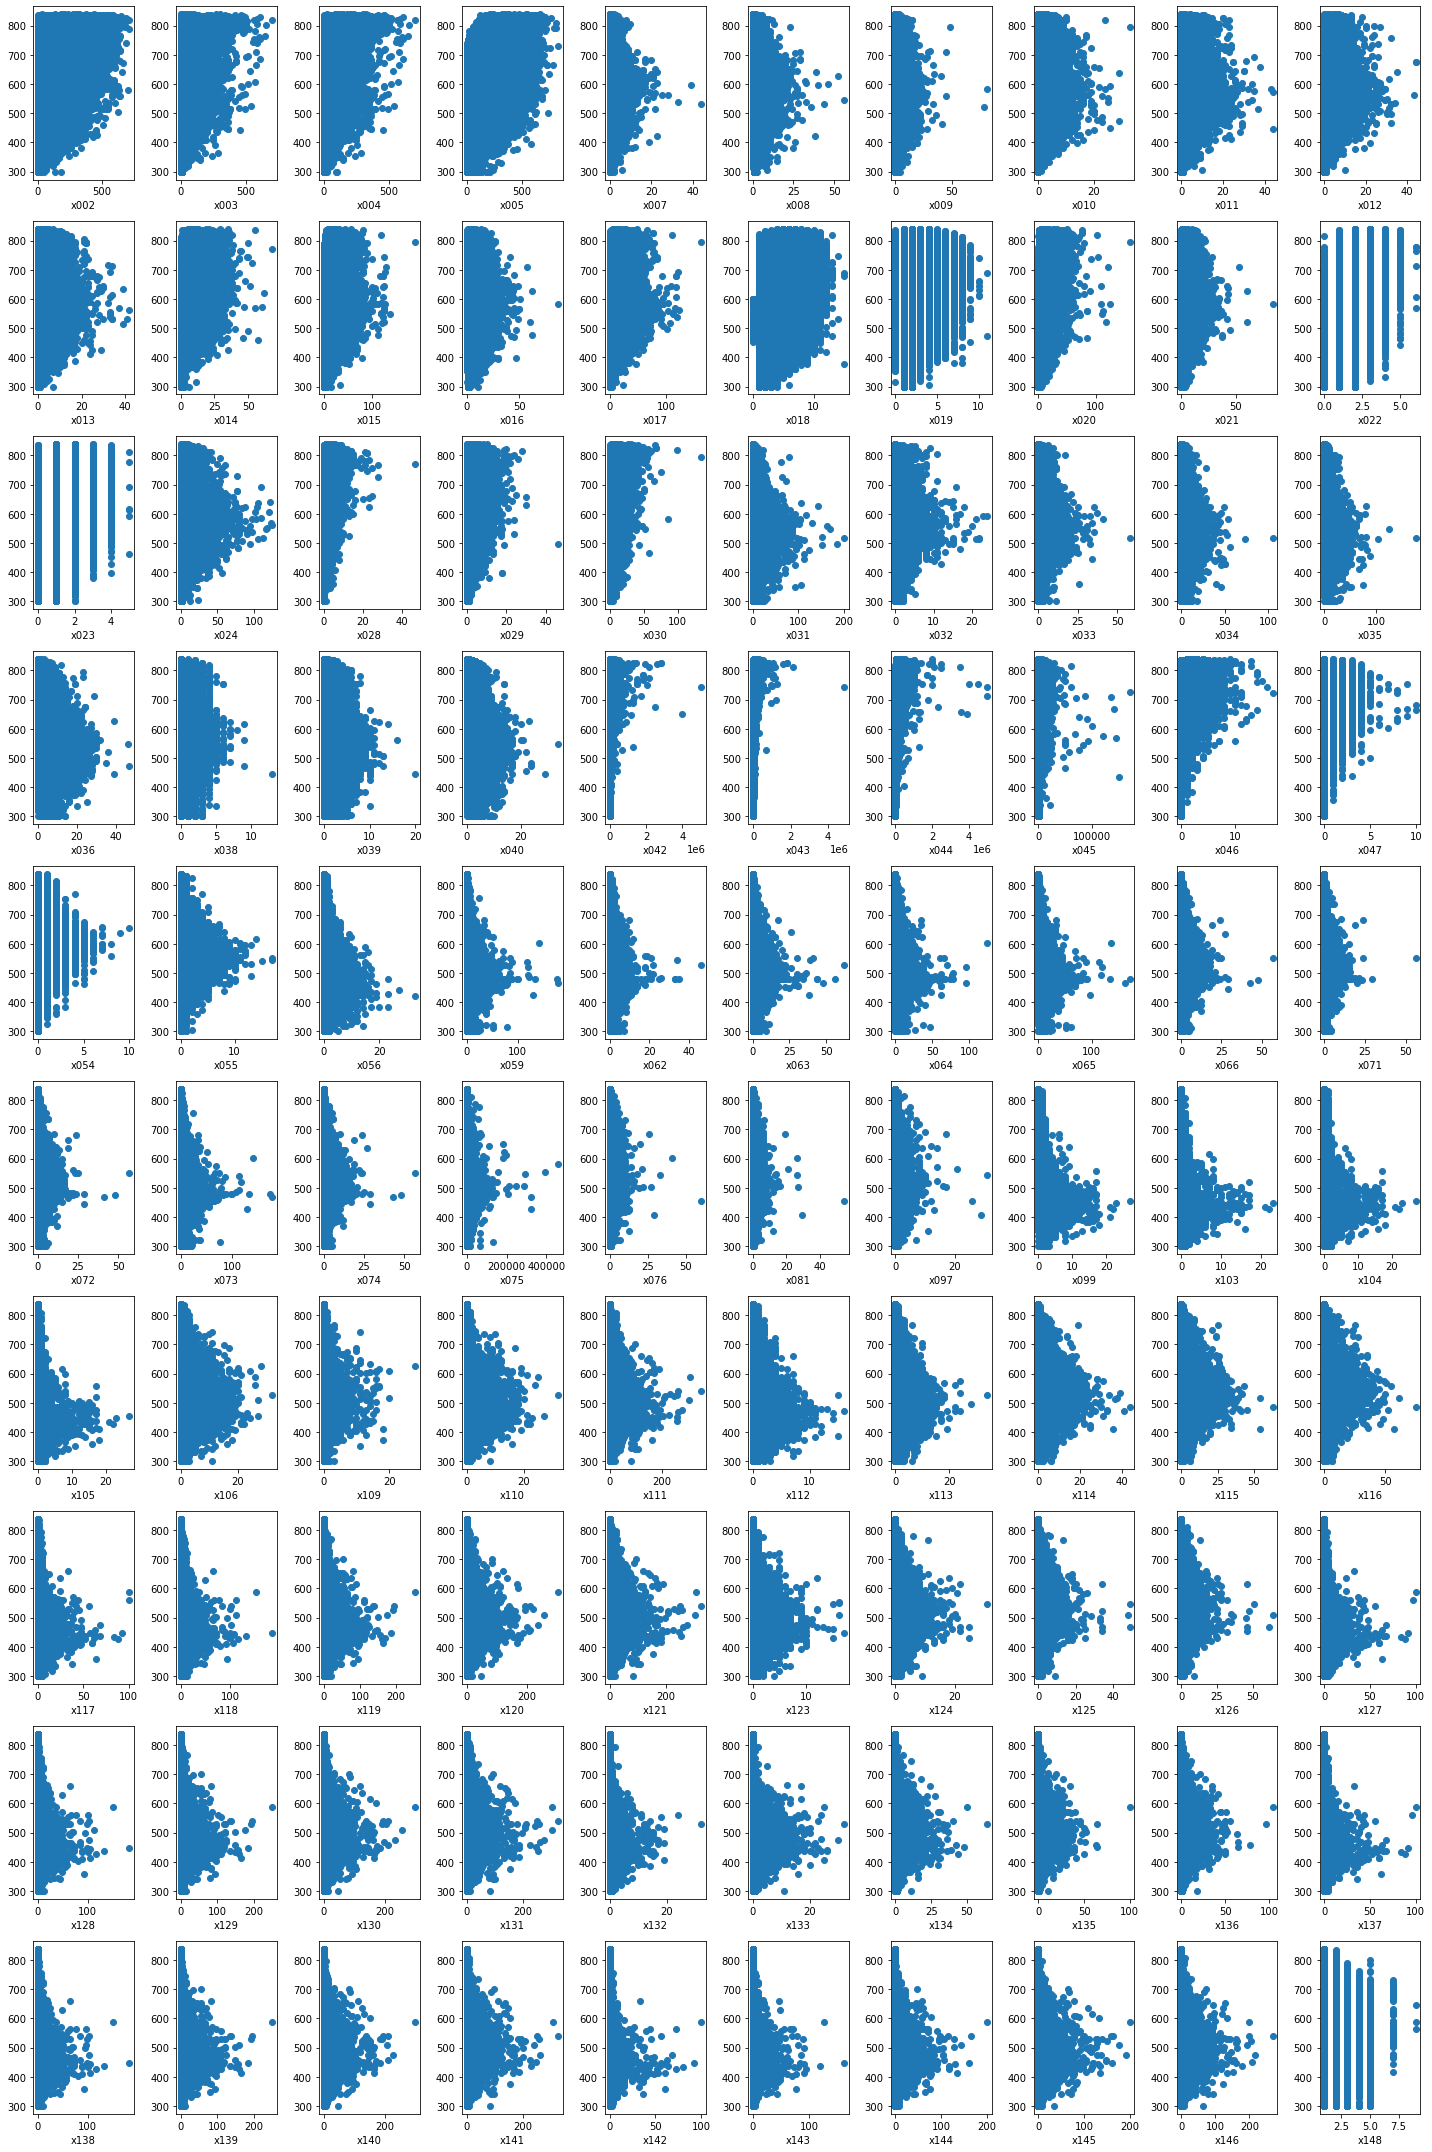

In [36]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i]],df['y'])
    ax.set_xlabel(col[i])
plt.tight_layout()

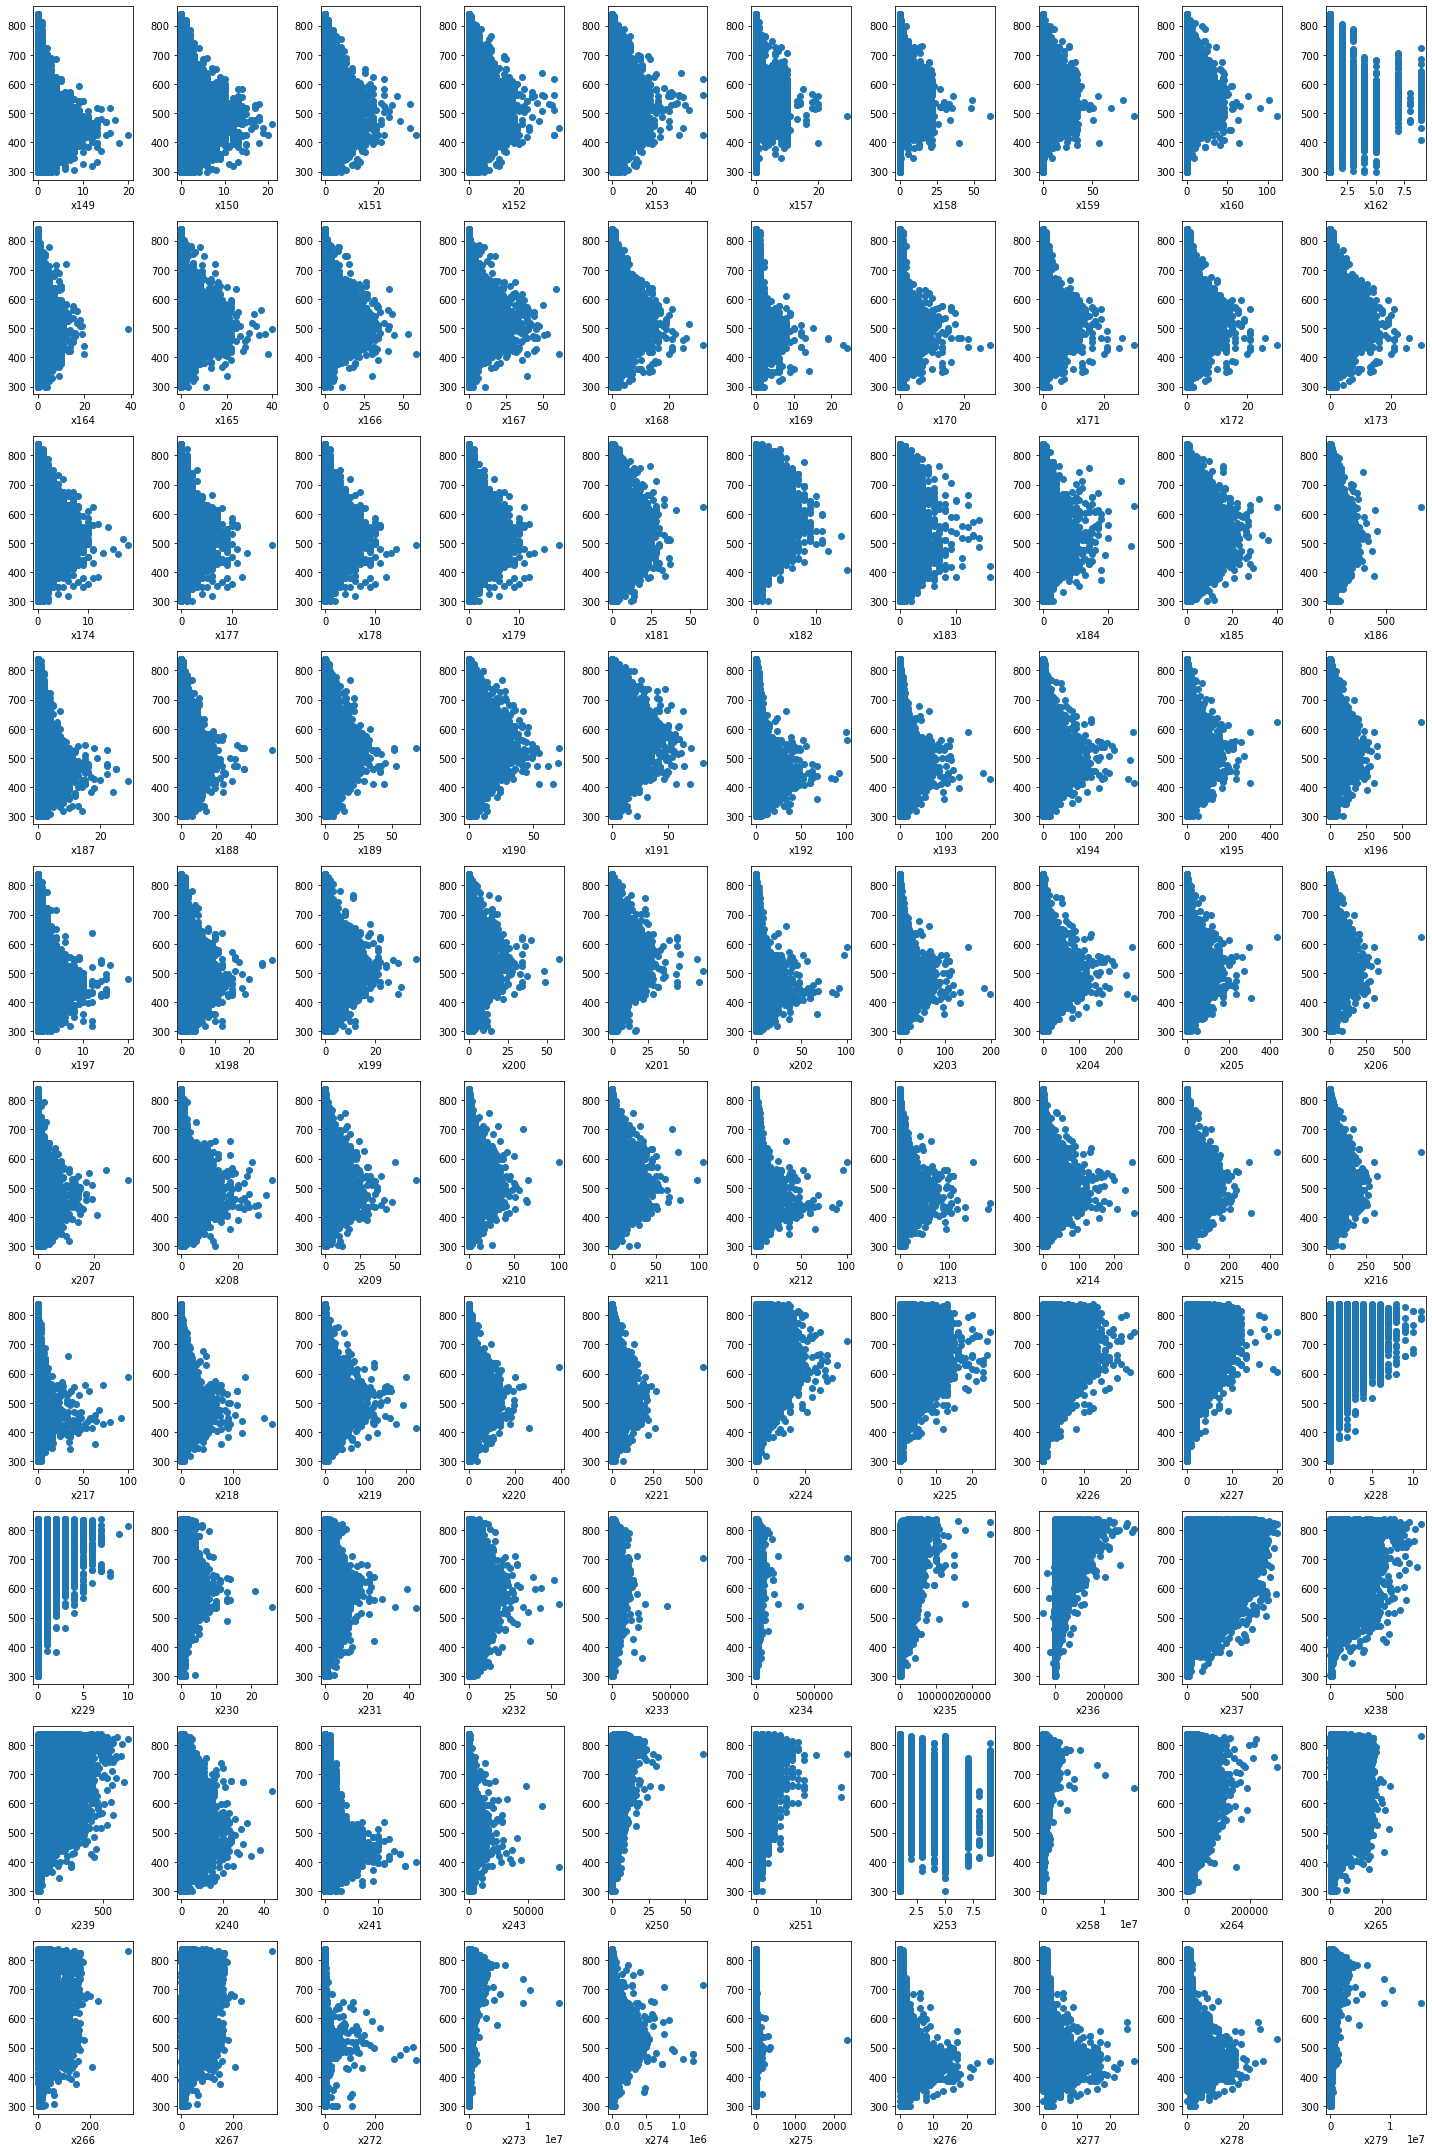

In [38]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 101):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+100]],df['y'])
    ax.set_xlabel(col[i+100])
plt.tight_layout()

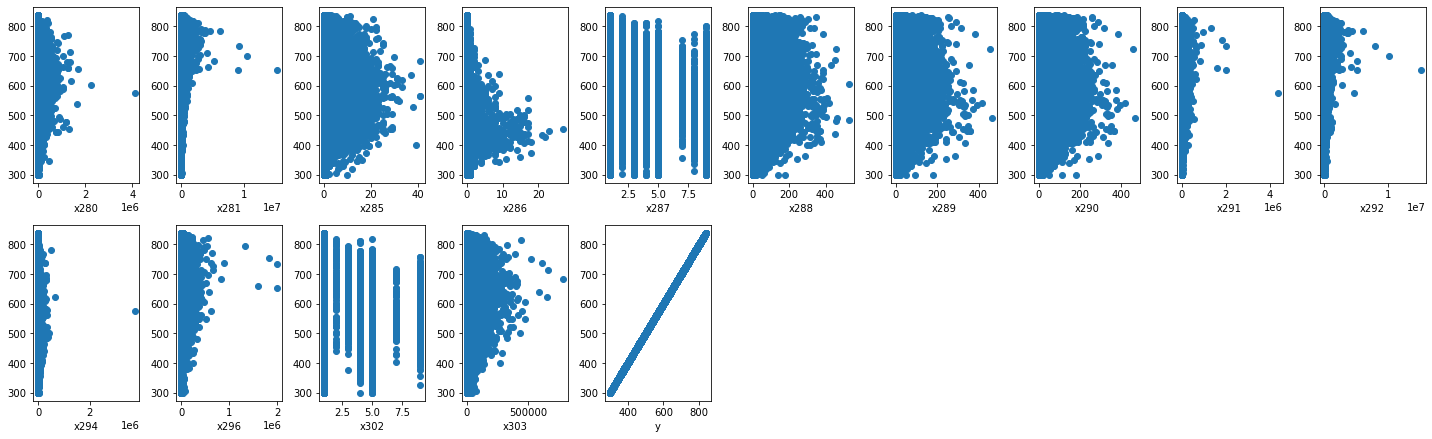

In [40]:
col = df.columns
plt.figure(figsize=(20,30))
for i in range (1, 16):
    ax=plt.subplot(10, 10, i)
    plt.scatter(df[col[i+200]],df['y'])
    ax.set_xlabel(col[i+200])
plt.tight_layout()

## XGBoost Model Building, Validation and Tuning

### Most frequent Imputation,With Outlier, All features, Depth-3-20000 trees**

In [2]:
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import absolute
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import Lasso
from numpy import absolute
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import arange
%matplotlib inline
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('train_clean_withOutl.csv')
df_test = pd.read_csv('test_clean.csv')

In [16]:
X_train = df.drop('y',axis=1)
y_train = df['y']

In [17]:
X_test = df_test.drop('y',axis=1)
y_test = df_test['y']

In [18]:
# ensure that the target variable is a 2d array
y_train = y_train.to_numpy().reshape((len(y_train),1))
y_test = y_test.to_numpy().reshape((len(y_test),1))

In [ ]:
my_model = XGBRegressor(n_estimators=20000, learning_rate=0.05, njobs=-1,tree_method='gpu_hist')
my_model.fit(X_train, y_train, early_stopping_rounds=500, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=True)


Streaming output truncated to the last 5000 lines.
[9693]	validation_0-rmse:21.78	validation_1-rmse:26.7458
[9694]	validation_0-rmse:21.7796	validation_1-rmse:26.7459
[9695]	validation_0-rmse:21.7791	validation_1-rmse:26.7458
[9696]	validation_0-rmse:21.7781	validation_1-rmse:26.746
[9697]	validation_0-rmse:21.7776	validation_1-rmse:26.7459
[9698]	validation_0-rmse:21.7773	validation_1-rmse:26.7459
[9699]	validation_0-rmse:21.7768	validation_1-rmse:26.7461
[9700]	validation_0-rmse:21.7765	validation_1-rmse:26.7461
[9701]	validation_0-rmse:21.7759	validation_1-rmse:26.7461
[9702]	validation_0-rmse:21.7755	validation_1-rmse:26.7464
[9703]	validation_0-rmse:21.7749	validation_1-rmse:26.7465
[9704]	validation_0-rmse:21.7746	validation_1-rmse:26.7466
[9705]	validation_0-rmse:21.7743	validation_1-rmse:26.7463
[9706]	validation_0-rmse:21.7739	validation_1-rmse:26.7463
[9707]	validation_0-rmse:21.7734	validation_1-rmse:26.7462
[9708]	validation_0-rmse:21.7731	validation_1-rmse:26.7464
[9709]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=20000,
             n_jobs=1, njobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='gpu_hist',
             verbosity=1)

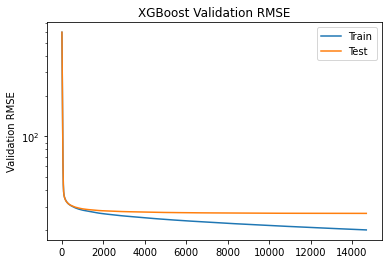

In [ ]:
# retrieve performance metrics
results = my_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.yscale('log')
plt.ylabel('Validation RMSE')
plt.title('XGBoost Validation RMSE')
plt.show()

In [ ]:
## save the train dataset proprocessed reviews to a file
best_model = hyp_model
best_model.save_model("xg_model_33.pkl")

In [13]:
best_model = XGBRegressor()
best_model.load_model("xg_model_33.pkl")

[07:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred_train = best_model.predict(X_train)
regression_metrics(X_train.shape[1],y_train,y_pred_train,'Train')

Train RMSE: 18.570
Train MAE: 13.165
Train R2: 0.975
Train Adjusted-R2 :  0.9753178609775484


## Model Evaluation

### Most Frequent imputation, WithOutliers, All Features, XGBoost-20000 trees

In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [185]:
import pandas as pd
df_test = pd.read_csv('test.csv')

In [186]:

import pickle
with open('imputer.pkl', 'rb') as f:
    imputer = pickle.load(f)

In [187]:
with open('train_cols.pkl', 'rb') as f:
    train_cols = pickle.load(f)

In [188]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
xg_model.load_model("xg_model_33.pkl")

[11:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:851: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


C:\Users\Sriram\anaconda3\lib\site-packages\xgboost\sklearn.py:566: UserWarning: Loading a native XGBoost model with Scikit-Learn interface.
  warnings.warn(


In [189]:
df_test = df_test[train_cols]

In [190]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [191]:
Xtrans = imputer.transform(X)

In [192]:
df_test_concat  = pd.concat([pd.DataFrame(Xtrans),pd.DataFrame(y)],axis=1)
df_test_concat.columns = df_test.columns
df_test = df_test_concat.copy()
df_test.head()

,x001,x002,x003,x004,x005,x007,x008,x009,x010,x011,...,x288,x289,x290,x291,x292,x294,x296,x302,x303,y
0,1190584.0,29.0,6.0,17.0,122.0,0.0,2.0,0.0,1.0,0.0,...,29.0,6.0,17.5,9951.0,9951.0,0.0,9951.0,1.0,0.0,625
1,1175513.0,72.0,72.0,72.0,72.0,0.0,0.0,0.0,0.0,3.0,...,72.0,72.0,72.0,4380.0,4380.0,4380.0,0.0,5.0,4380.0,501
2,1173853.0,4.0,2.0,4.0,78.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,660
3,1426240.0,4.0,2.0,4.0,119.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,512
4,1470255.0,31.0,31.0,31.0,31.0,0.0,0.0,1.0,1.0,0.0,...,31.0,31.0,31.0,0.0,0.0,0.0,0.0,1.0,0.0,527


In [193]:
df_test_copy = df_test.copy()
X = df_test_copy.drop('y',axis=1)
y = df_test_copy.pop('y')

In [194]:
best_model = xg_model
y_pred = best_model.predict(X)
regression_metrics(X.shape[1],y,y_pred,'Test') 

Test RMSE: 26.333
Test MAE: 18.879
Test R2: 0.951
Test Adjusted-R2 :  0.9503866640220797
Test accuracy: 14.408
